# Random walks

In [1]:
from collections import Counter
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Simulation

Simulate a random walk in 1D.  At each (discrete) time step, particles can move right with probability `prob`, or left with probability 1 - `prob`.

In [2]:
def random_walk(nr_steps, prob=0.5):
    x = 0;
    for _ in range(nr_steps):
        if random.random() < prob:
            x += 1
        else:
            x -= 1
    return x

The simulation has to be done a large number of times to obtain meaningful statistics.

In [3]:
def random_walk_distr(nr_walks, nr_steps, prob=0.5):
    positions = Counter()
    for _ in range(nr_walks):
        positions[random_walk(nr_steps, prob)] += 1/nr_walks
    return positions

In [4]:
nr_walks, nr_steps = 10_000, 100

In [5]:
positions = random_walk_distr(nr_walks=nr_walks, nr_steps=nr_steps)

In [6]:
x_values = np.linspace(-nr_steps, nr_steps, 2*nr_steps + 1)
y_values = np.zeros_like(x_values)
for position, prob in positions.items():
    y_values[position + nr_steps] = prob

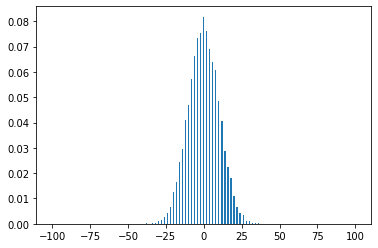

In [7]:
_ = plt.bar(x_values, y_values)

## Theoretical distribution

### Using numpy

In [8]:
def compute_distr(t_max):
    distr = np.zeros(t_max + 1)
    distr[t_max//2] = 1.0
    for _ in range(t_max):
        distr += np.roll(distr, 1)
    distr = np.roll(distr, -(t_max - 1)//2)
    return distr/sum(distr)

In [9]:
for t_max in range(8):
    print(t_max, compute_distr(t_max))

0 [1.]
1 [0.5 0.5]
2 [0.25 0.5  0.25]
3 [0.125 0.375 0.375 0.125]
4 [0.0625 0.25   0.375  0.25   0.0625]
5 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
6 [0.015625 0.09375  0.234375 0.3125   0.234375 0.09375  0.015625]
7 [0.0078125 0.0546875 0.1640625 0.2734375 0.2734375 0.1640625 0.0546875
 0.0078125]


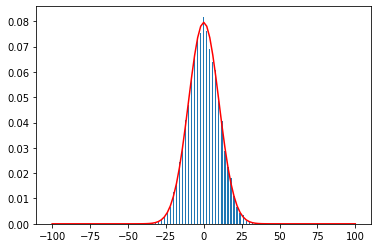

In [10]:
distr = compute_distr(100)
plt.bar(x_values, y_values)
_ = plt.plot(np.arange(-nr_steps, nr_steps + 1, 2), distr, 'r')

### Using arrays

In [11]:
def next_prob_distr(current_distr=None):
    if current_distr is None:
        return np.array([1.0])
    next_distr = np.empty(len(current_distr) + 1)
    next_distr[0] = next_distr[-1] = current_distr[0]/2.0
    for i in range(1, len(current_distr)//2 + 1):
        next_distr[i] = next_distr[-i - 1] = (current_distr[i - 1] + current_distr[i])/2.0
    if len(current_distr) % 2 == 0:
        next_distr[len(current_distr)//2] = current_distr[len(current_distr)//2]
    return next_distr

In [12]:
def compute_distr(nr_steps):
    distr = next_prob_distr(None)
    for _ in range(nr_steps):
        distr = next_prob_distr(distr)
    return distr

In [13]:
for t_max in range(8):
    print(t_max, compute_distr(t_max))

0 [1.]
1 [0.5 0.5]
2 [0.25 0.5  0.25]
3 [0.125 0.375 0.375 0.125]
4 [0.0625 0.25   0.375  0.25   0.0625]
5 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
6 [0.015625 0.09375  0.234375 0.3125   0.234375 0.09375  0.015625]
7 [0.0078125 0.0546875 0.1640625 0.2734375 0.2734375 0.1640625 0.0546875
 0.0078125]


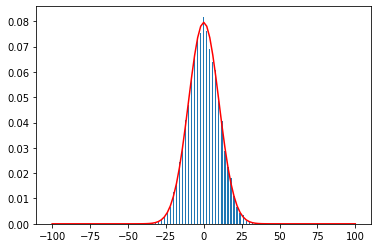

In [14]:
distr = compute_distr(nr_steps)
plt.bar(x_values, y_values)
_ = plt.plot(np.arange(-nr_steps, nr_steps + 1, 2), distr, 'r')

### Combinations

In [15]:
from math import factorial

In [16]:
def combinations(m, n):
    return factorial(n)//(factorial(m)*factorial(n - m))

In [17]:
def compute_distr(t_max):
    probs = list()
    for i in range(t_max + 1):
        probs.append(combinations(i, t_max)/2**t_max)
    return probs

In [18]:
for t_max in range(10):
    print(t_max, compute_distr(t_max))

0 [1.0]
1 [0.5, 0.5]
2 [0.25, 0.5, 0.25]
3 [0.125, 0.375, 0.375, 0.125]
4 [0.0625, 0.25, 0.375, 0.25, 0.0625]
5 [0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]
6 [0.015625, 0.09375, 0.234375, 0.3125, 0.234375, 0.09375, 0.015625]
7 [0.0078125, 0.0546875, 0.1640625, 0.2734375, 0.2734375, 0.1640625, 0.0546875, 0.0078125]
8 [0.00390625, 0.03125, 0.109375, 0.21875, 0.2734375, 0.21875, 0.109375, 0.03125, 0.00390625]
9 [0.001953125, 0.017578125, 0.0703125, 0.1640625, 0.24609375, 0.24609375, 0.1640625, 0.0703125, 0.017578125, 0.001953125]


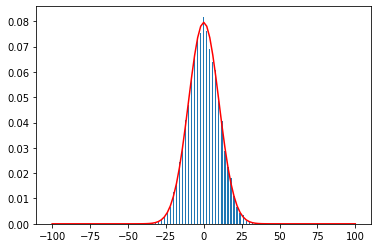

In [19]:
distr = compute_distr(nr_steps)
plt.bar(x_values, y_values)
_ = plt.plot(np.arange(-nr_steps, nr_steps + 1, 2), distr, 'r')